In [37]:
# is this the folder with the script in it?
scriptDir<-getwd()
scriptDir

# if not, uncomment and use this instead
# scriptDir<-""

[1] "/Users/anyaemerson/Documents/github/emersonae/SensorDataProcessing/rriv_methane"

In [38]:
methaneFunctions<-paste(scriptDir,"/methane_functions.r",sep="")
methaneFunctions
if (file.exists(methaneFunctions)){
    source(methaneFunctions)
} else {
    print("manually correct the location and/or name of methane_functions.r")
}

[1] "/Users/anyaemerson/Documents/github/emersonae/SensorDataProcessing/rriv_methane/methane_functions.r"

# 0. Load packages used

In [39]:
# Package names
packages <- c("tidyverse","dplyr", "doBy", "lubridate", "ggplot2", "Hmisc", "zoo", "viridis", "gam", "ggeffects", "reshape2", "mgcv")
packageHandler(packages)

In [40]:
directory0<-"~/Library/Mobile\ Documents/com~apple~CloudDocs/Documents/RRIV/Data/test/20230621-pdock"
directory1<-"~/Library/Mobile\ Documents/com~apple~CloudDocs/Documents/RRIV/Data/test/20230621-pdock/RRIV"
directory2<-"~/Library/Mobile\ Documents/com~apple~CloudDocs/Documents/RRIV/Data/test/20230621-pdock/temp"
directory3<-"~/Library/Mobile\ Documents/com~apple~CloudDocs/Documents/RRIV/Data/test/20230621-pdock/LGR"

In [53]:
# create output directory path based on input directory
outputDir<-"~/Library/Mobile\ Documents/com~apple~CloudDocs/Documents/RRIV/Data/test/20230621-pdock/output"
# create the output directory if necessary
newDir(dirPath = outputDir)

#directory to save any files to git hub 
gitDir<-"~/Library/Mobile\ Documents/com~apple~CloudDocs/Documents/github/emersonae/SensorDataProcessing/rriv_methane/anya_methane/figures"


Output directory, ~/Library/Mobile Documents/com~apple~CloudDocs/Documents/RRIV/Data/test/20230621-pdock/output, already exists


In [42]:
# savePlot<-function(plot, tag="",width=800,height=800,od=outputDir){
#     if(substr(od, nchar(od), nchar(od)) != "/"){ od<-paste0(od,"/") }
#         pngPath = paste0(od, deparse(substitute(plot)), tag,"_", ".png")
#         png(file = pngPath, width=width, height=height)
#         print(plot)
#         dev.off()
# }

In [43]:
# cal_list<-c(
#     "cal1",
#     "cal2",
#     "cal3",
#     "cal4",
#     "cal5")

# 3. Read in data from both RRIV and LGR
note: can separate paths for LGR and RRIV if you want, but concat_dirs should work anyways making use of the filePattern argument

In [44]:

# if(!file.exists("~/Library/Mobile\ Documents/com~apple~CloudDocs/Documents/RRIV/Data/test/20230621-pdock/output/rriv_data.csv")){
    #rriv df
    rriv_data<-concat_dirs(directory1, read_rriv_CSV, filePattern=".CSV", minFileSize=400)
    rriv_data<-process_rriv_columns(rriv_data)
# rriv_data
# had to manually remove NA row 
    #add col for co2
#     rriv_data['co2_ppm']<-NA
#     rriv_data$co2_ppm<-NA

    #cal3 df
    rriv_cal3<-concat_dirs(directory2, read_rriv_CSV, filePattern=".CSV", minFileSize=400)
    rriv_cal3<-process_rriv_columns(rriv_cal3)

    #combine
    rriv_data<-rbind(rriv_data,rriv_cal3)
#     rriv_data<-rbind(rriv_cal3,rriv_data[, 16:17])

    
    UUIDdict=c(
    "57FF6E068387575148360767"="CAL1",
    "57FF6D068387575151290167"="CAL2",
    "57FF6F068387575149330867"="CAL3",
    "57FF6E068387575140070767"="CAL4",
    "50FF74068678545256252467"="CAL5")
    rriv_data<-createSensorColFromIDs(rriv_data,idCol = "uuid",dict = UUIDdict)

    
    saveDFcsv(rriv_data)
# }
# rriv_data


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or mo

[1] "Dataframe generated, manually process column types if necessary"


Warning message in process_rriv_columns(rriv_data):
“NAs introduced by coercion”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”


[1] "Dataframe generated, manually process column types if necessary"


Warning message:
“Unknown or uninitialised column: `Sensor`.”


[1] "~/Library/Mobile Documents/com~apple~CloudDocs/Documents/RRIV/Data/test/20230621-pdock/output/rriv_data.csv"


In [45]:
# rriv_data <- read.csv("~/Library/Mobile\ Documents/com~apple~CloudDocs/Documents/RRIV/Data/test/20230621-pdock/output/rriv_data.csv", header = TRUE, sep = ",")


In [46]:
lgr_data<-concat_dirs(directory3, read_GA_ZIP, filePattern=".zip", minFileSize=300)
    clean_temp()
lgr_data$Time<-lubridate::as_datetime(lgr_data$Time)
saveDFcsv(lgr_data)



[1] "Dataframe generated, manually process column types if necessary"
[1] "~/Library/Mobile Documents/com~apple~CloudDocs/Documents/RRIV/Data/test/20230621-pdock/output/lgr_data.csv"


In [47]:
# # str(rriv_data)
# rriv_data$co2_ppm<-as.numeric(rriv_data$co2_CO2_ppm)
# str(rriv_data)

# RAW PLOTS

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


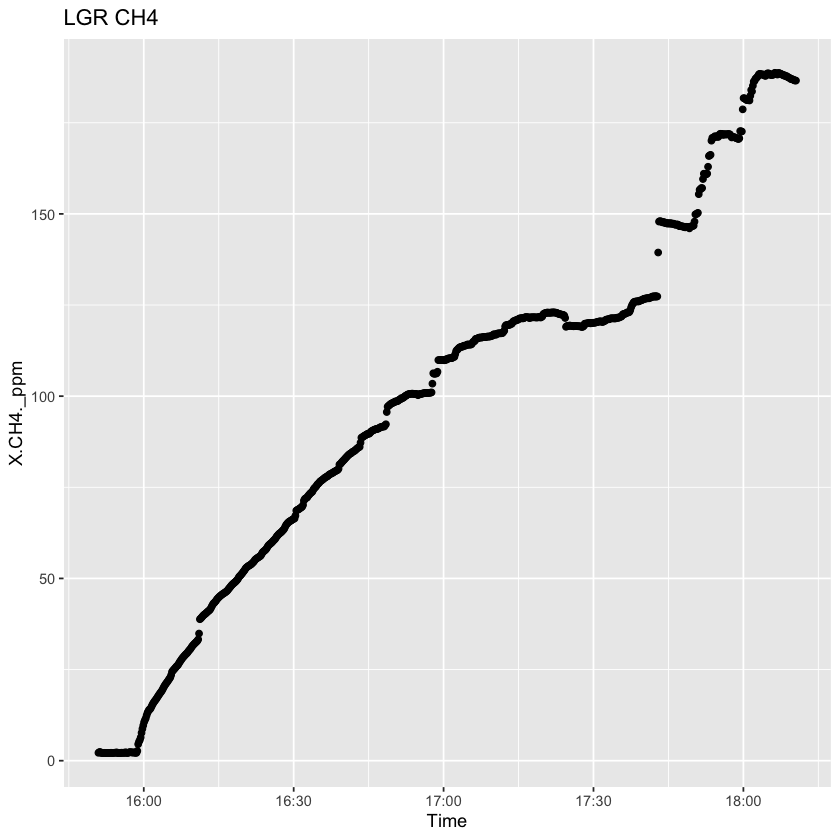

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


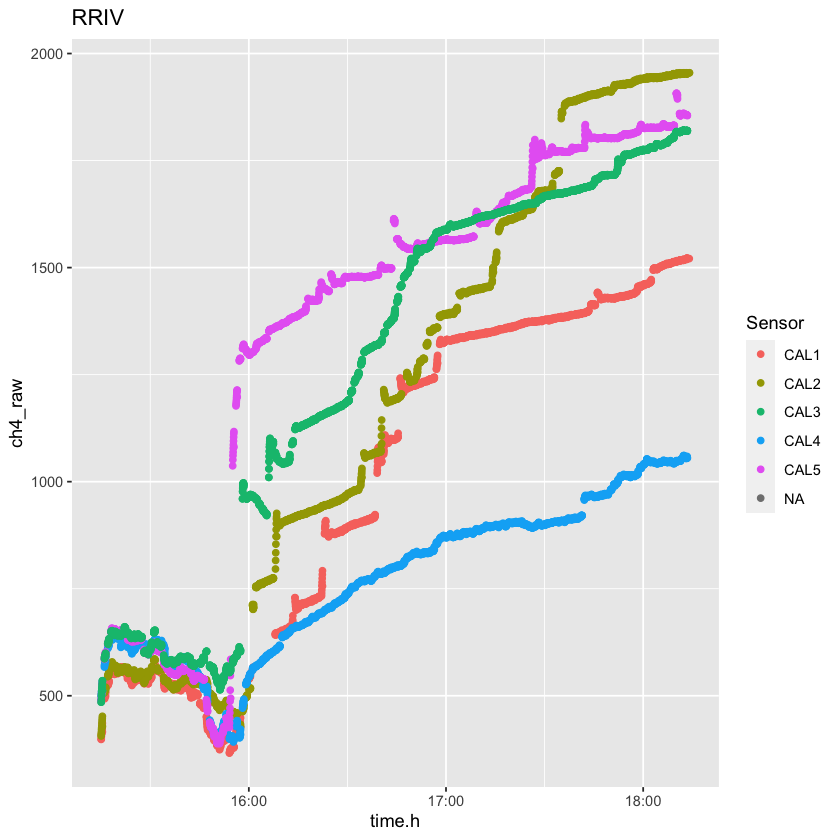

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


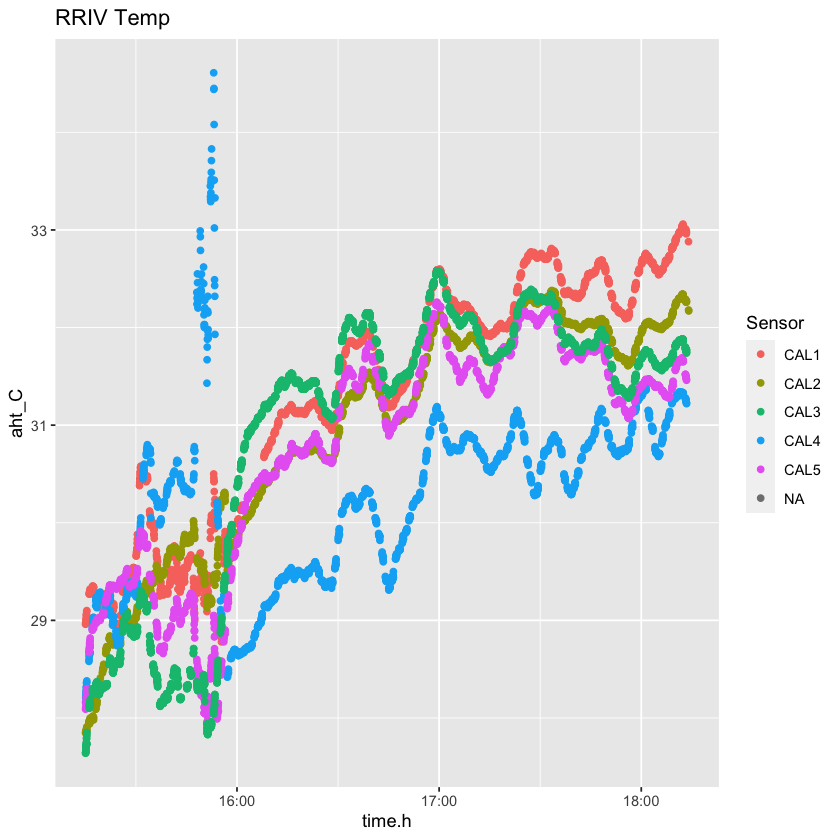

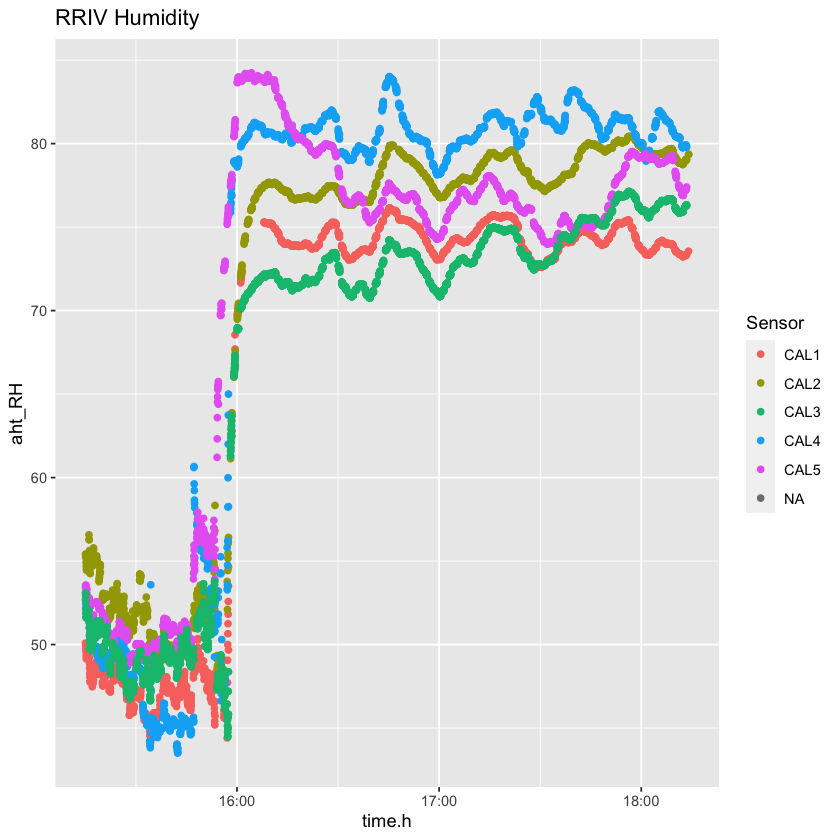

ERROR while rich displaying an object: Error in `geom_point()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error:
! object 'co2_ppm' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handle

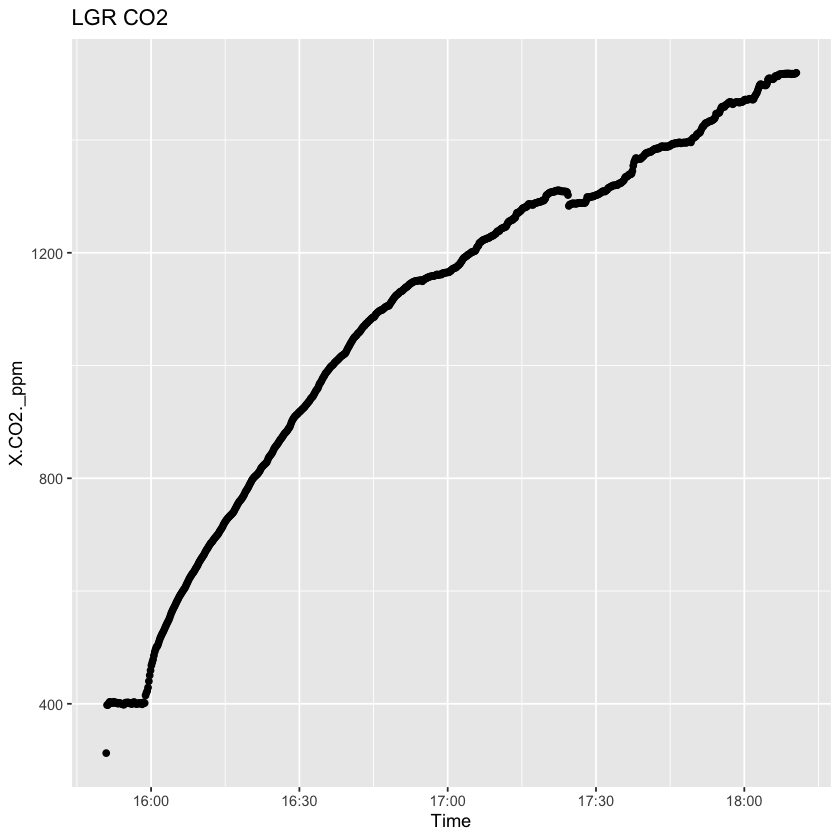

In [48]:
ggplot(lgr_data, aes(x=Time, y=X.CH4._ppm))+geom_point()+labs(title="LGR CH4")
ggplot(rriv_data, aes(x=time.h, y=ch4_raw, color=Sensor))+geom_point()+labs(title="RRIV")
ggplot(rriv_data, aes(x=time.h, y=aht_C, color=Sensor))+geom_point()+labs(title="RRIV Temp")
ggplot(rriv_data, aes(x=time.h, y=aht_RH, color=Sensor))+geom_point()+labs(title="RRIV Humidity")
ggplot(lgr_data, aes(x=Time, y=X.CO2._ppm))+geom_point()+labs(title="LGR CO2")
ggplot(rriv_data, aes(x=time.h, y=co2_ppm, color=Sensor))+geom_point()+labs(title="RRIV CO2")


In [49]:
# str(rriv_data)
# range(rriv_data$time.h,na.rm=TRUE)

# 4. Align time frames of RRIV & LGR 

In [50]:
# start time is the max between the starting points for each range
start<-max(range(rriv_data$time.h,na.rm=TRUE)[1],range(lgr_data$Time,na.rm=TRUE)[1])
# start
# end time is the min between the ending points for each range
end<-min(range(rriv_data$time.h,na.rm=TRUE)[2],range(lgr_data$Time,na.rm=TRUE)[2])

# subset the rriv data
rriv_data_overlap<-rriv_data[rriv_data$time.h>start & rriv_data$time.h<end,]
range(rriv_data_overlap$time.h,na.rm=TRUE)

# subset the lgr data
lgr_data_overlap<-lgr_data[lgr_data$Time>start & lgr_data$Time<end,]
range(lgr_data_overlap$Time,na.rm=TRUE)

[1] "2023-06-21 15:51:04 UTC" "2023-06-21 18:10:27 UTC"

[1] "2023-06-21 15:51:05 UTC" "2023-06-21 18:10:21 UTC"

In [51]:
rriv_data_ol_raw<-rriv_data_overlap[rriv_data_overlap$type=="raw",]
rriv_data_ol_summary<-rriv_data_overlap[rriv_data_overlap$type=="summary",]

# 4.1 raw plots

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


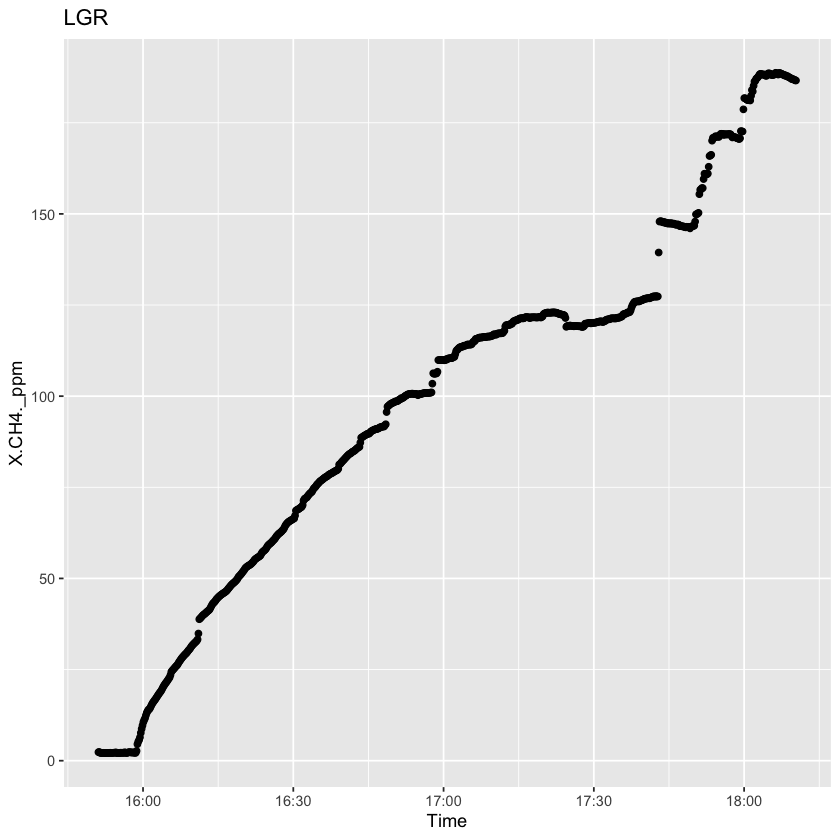

pdf 
  2

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


pdf 
  2

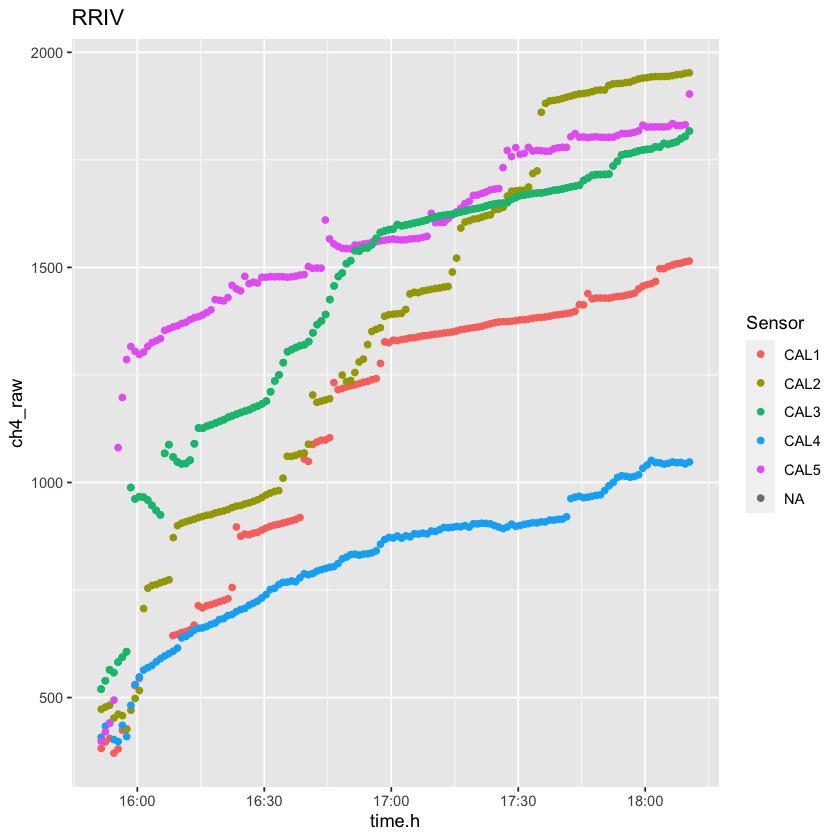

In [54]:
lgr_plt<-ggplot(lgr_data_overlap, aes(x=Time, y=X.CH4._ppm))+geom_point()+labs(title="LGR")
rriv_plt<-ggplot(rriv_data_ol_summary, aes(x=time.h, y=ch4_raw, color=Sensor))+geom_point()+labs(title="RRIV")
lgr_plt
rriv_plt
savePlot(lgr_plt,"pdock",od=gitDir)
savePlot(rriv_plt,"pdock_all",od=gitDir)